In [253]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

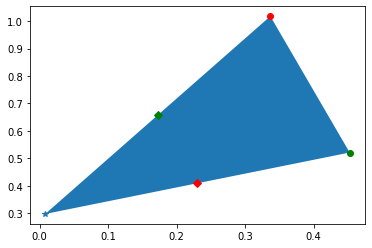

In [256]:
fig, ax = plt.subplots()
optimal_vertex = np.random.random(2)
sim = np.random.random((2,2))
simi = np.linalg.inv(sim)
h = ((sim / 2) + optimal_vertex)[::-1] # Slice to correspond the opposite facet 
#N = (h - optimal_vertex)[..., ::-1] @ np.array(((-1,0), (0,1)))
N = sim[::-1][..., ::-1] @ np.array(((-1,0), (0,1))) # First slice match vertex index with opposite facet. Second slice and array mult for building the orthogonal vector
N = (N.T / ((N ** 2).sum(axis=1)**.5)).T
points = np.array((*(sim + optimal_vertex), optimal_vertex))
plt.fill(points[..., 0], points[..., 1])
_ = plt.plot(points[0,0], points[0,1], 'ro', h[0,0], h[0,1], 'rD',
         points[1,0], points[1,1], 'go', h[1,0], h[1,1], 'gD',
         optimal_vertex[0], optimal_vertex[1], '*')

In [257]:
print(f'points: {points[:-1]}')
print(f'h: {h}')
D = abs(sim @ N.T)
print(D[(0,1), (0,1)])
print((1 / ((simi ** 2).sum(axis=0))) ** .5)

points: [[0.33693659 1.01775442]
 [0.45274301 0.52118747]]
h: [[0.23056793 0.4093457 ]
 [0.17266472 0.65762918]]
[0.49561001 0.31144466]
[0.49561001 0.31144466]
